In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from src.cdf import *
from src.poly_fit import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
x=np.random.normal(0,1,800)
y=cdf_funct(x)

fit=polyfit(y,beta_rat_polyfit(y, np.sort(x), order=3))

_,y_sub,fit_spl_rpol=spl_polyfit(x,y)

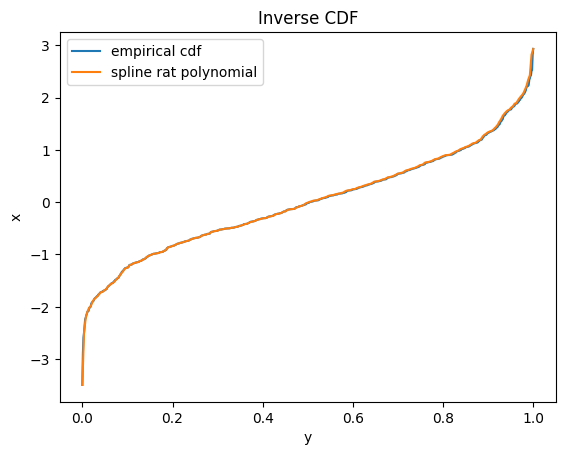

In [4]:
plt.plot(y, np.sort(x), label="empirical cdf")
# plt.plot(y, fit)
plt.plot(y_sub, fit_spl_rpol, label="spline rat polynomial")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Inverse CDF")
plt.legend()
